**Differential equations system:**

$$\begin{cases}
  \frac{du}{dx} = y \\
  \frac{du}{dy} = x^2 - 1
\end{cases}$$

**First integral:**

$$C(x, y) = \frac{x^3}{3} - x - \frac{y^2}{2}$$

In [11]:
import matplotlib.pyplot as plt
from ODElib import *

def f(t : float, u : Vector):
    return Vector(u[1], u[0]**2 - 1)

# first integral
def C(u : Vector):
    return (u[0]**3)/3 - u[0] - (u[1]**2)/2

def show_result(ts : list[float], us : list[Vector], C : Callable[[Vector], float]):
    fig = plt.figure(figsize=[10, 4])
    ax = fig.add_subplot(121)
    plt.plot(ts, [u[0] for u in us], label="x(t)")
    plt.plot(ts, [u[1] for u in us], label="y(t)")
    plt.plot(ts, [C(u) for u in us], label="C(x(t), y(t))")
    plt.hlines(C(us[0]), ts[0], ts[-1], linestyle="--", dashes=(0, (2, 5)), label="C[theory]", colors="red")
    plt.legend()
    fig.add_subplot(122, projection="3d")
    plt.plot(ts, [u[0] for u in us], [u[1] for u in us])
    plt.show()

**<center>Runge-Kutta methods</center>**

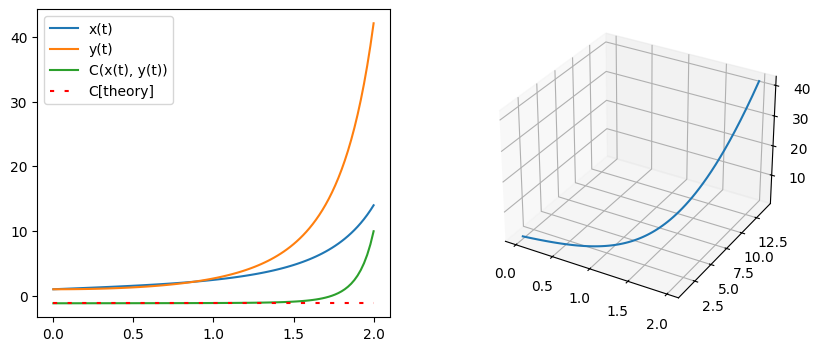

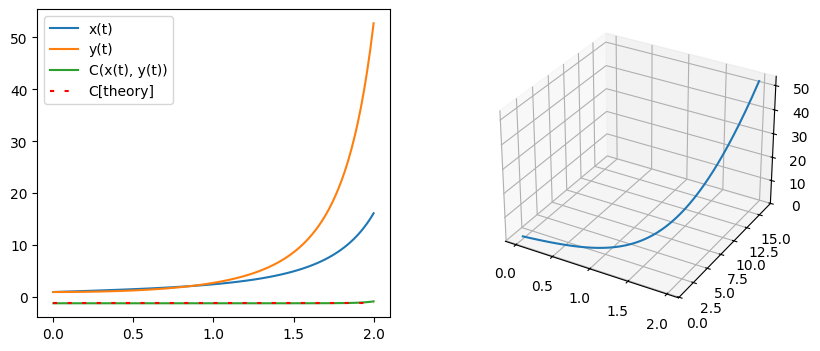

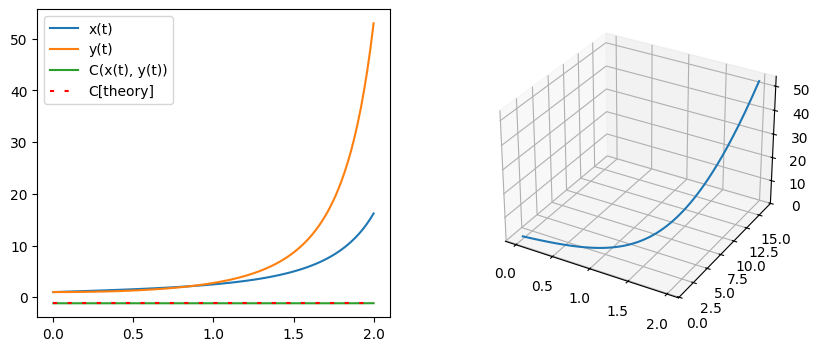

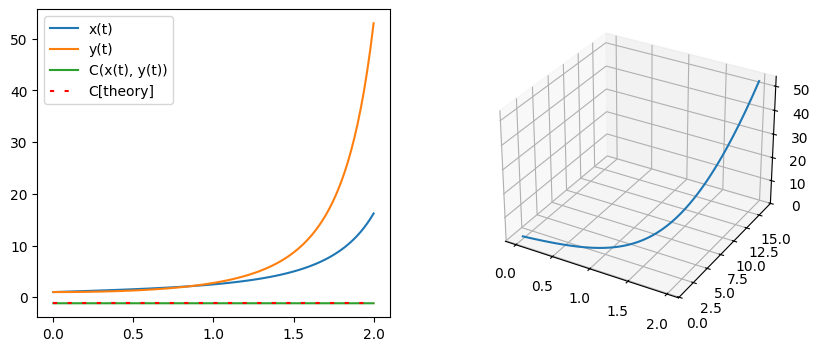

In [12]:
T = 2
h = 2e-2
N = int(T/h)
ts = [(h * n) for n in range(N + 1)]
u0 = Vector(1, 1)
show_result(ts, RungeKuttaMethods.explicit_1_order(f, u0, h, N), C)
show_result(ts, RungeKuttaMethods.explicit_2_order(f, u0, h, N), C)
show_result(ts, RungeKuttaMethods.explicit_3_order(f, u0, h, N), C)
show_result(ts, RungeKuttaMethods.explicit_4_order(f, u0, h, N), C)

**<center>Adams methods</center>**

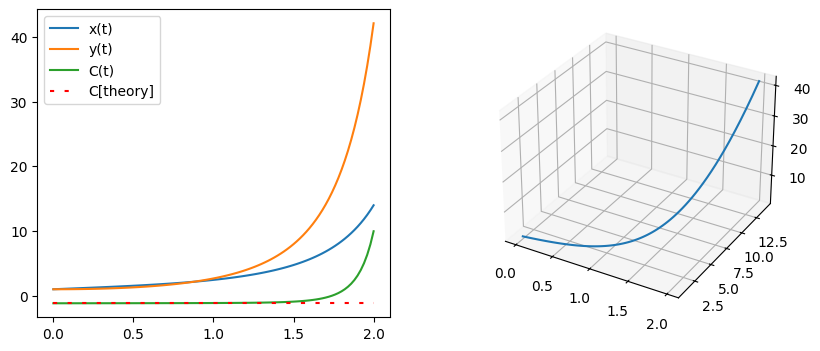

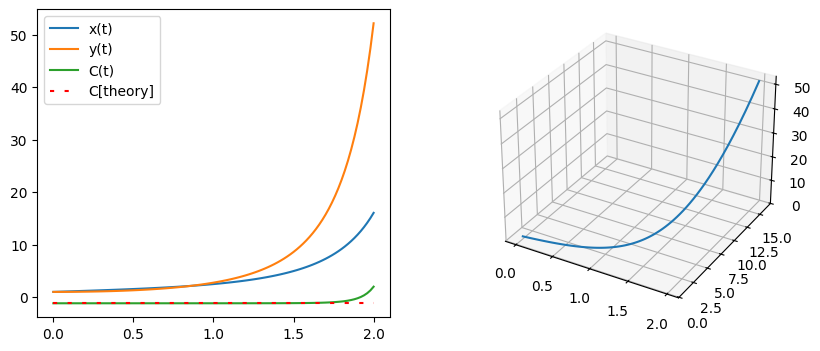

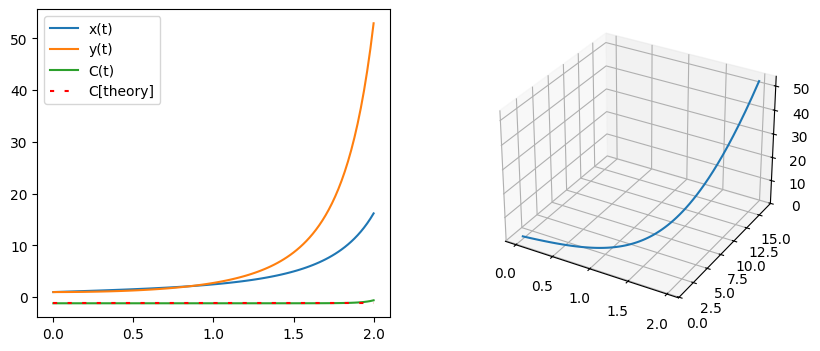

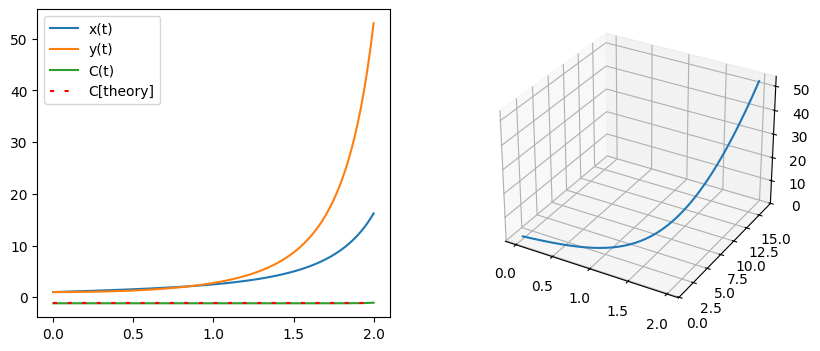

In [10]:
# starting points
sp = RungeKuttaMethods.explicit_4_order(f, u0, h, 3)

show_result(ts, AdamsMethods.explicit_1_order(f, [u0], h, N), C)
show_result(ts, AdamsMethods.explicit_2_order(f, sp[:2], h, N), C)
show_result(ts, AdamsMethods.explicit_3_order(f, sp[:3], h, N), C)
show_result(ts, AdamsMethods.explicit_4_order(f, sp, h, N), C)